<a href="https://colab.research.google.com/github/Dan-Analyst/DATA_ANALYSIS_-PROJECTS/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
path = "/content/drive/MyDrive/Housing/Housing.csv"
df=pd.read_csv(path)

In [5]:
print("Data Overview:")
print(df.head())
print("\nData Structure:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Overview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to

In [6]:
# Step 3: Data Cleaning
# Convert binary categorical variables to 0/1
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [7]:
# Convert furnishingstatus using one-hot encoding
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


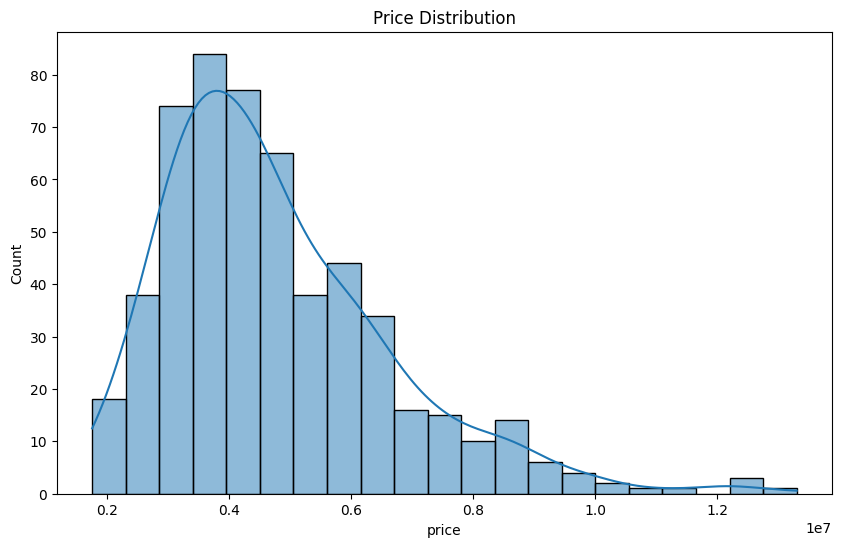

In [8]:
# Step 4: Exploratory Data Analysis
# Plot price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

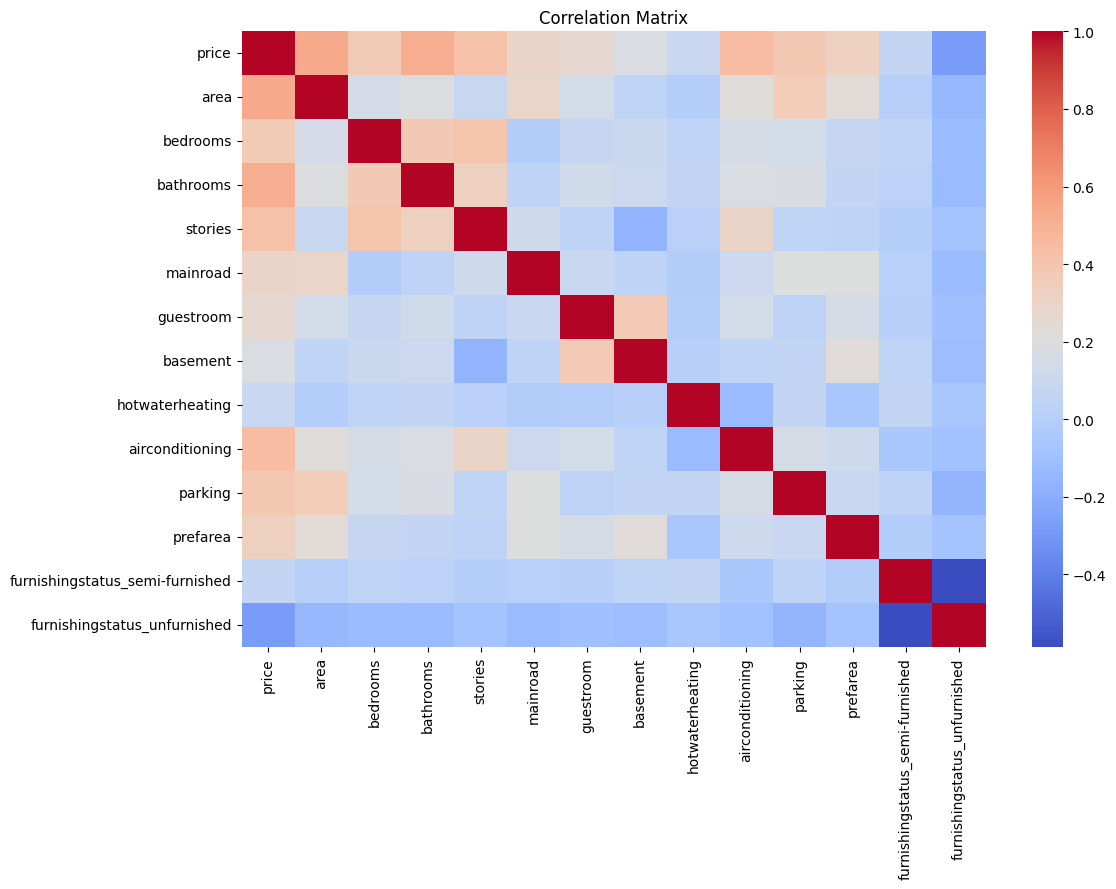

In [9]:
# Correlation matrix
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

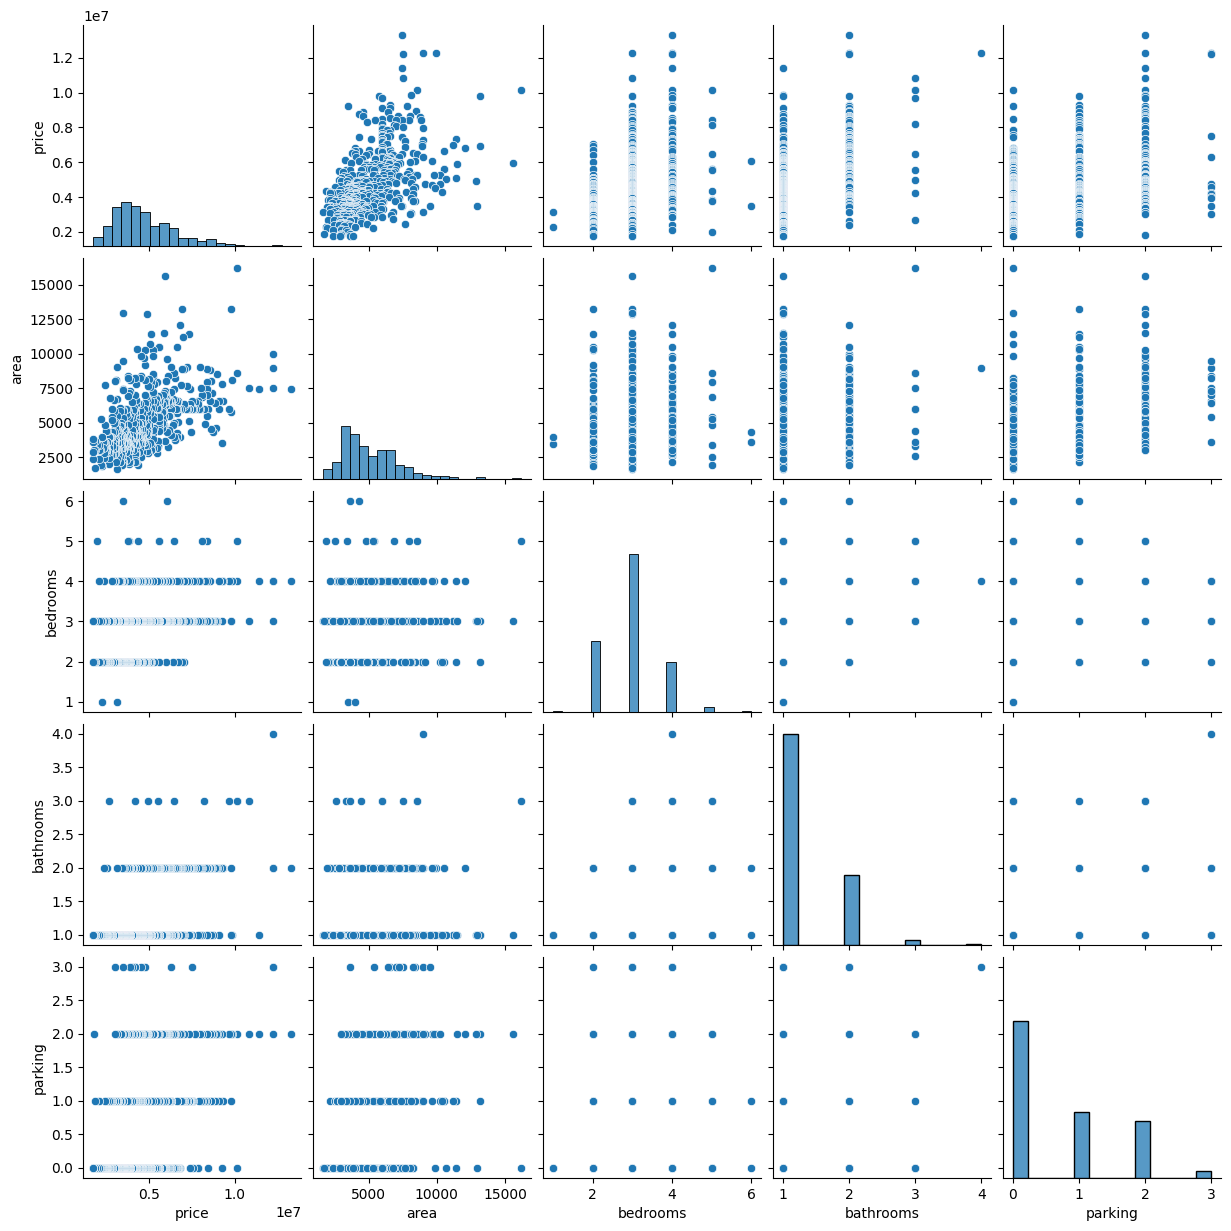

In [11]:
# Pairplot for key features
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'parking']])
plt.show()

In [12]:
# Step 5: Data Preparation
X = df.drop('price', axis=1)
y = df['price']


In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.select_dtypes(include=np.number).columns # Changed to numeric columns
# Convert X.values to numeric type
X_numeric = X.select_dtypes(include=np.number).values
vif_data["VIF"] = [variance_inflation_factor(X_numeric, i) for i in range(len(X.select_dtypes(include=np.number).columns))]
print("\nVIF Scores:")
print(vif_data)


VIF Scores:
            feature        VIF
0              area   8.237351
1          bedrooms  15.186992
2         bathrooms   9.397157
3           stories   7.878703
4          mainroad   6.767779
5         guestroom   1.466132
6          basement   2.012668
7   hotwaterheating   1.088037
8   airconditioning   1.740480
9           parking   1.944662
10         prefarea   1.485975


In [17]:
# Step 6: Model Building
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)

In [19]:
print("\nModel Performance:")
print(f'R-squared: {r2_score(y_test, y_pred):.3f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')



Model Performance:
R-squared: 0.646
MSE: 1523019469501.29
RMSE: 1234106.75


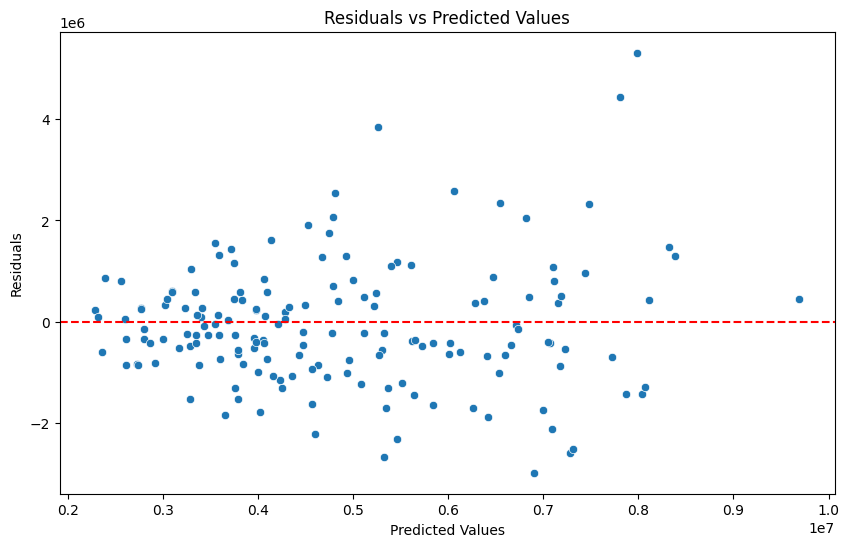

In [20]:
# Step 8: Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

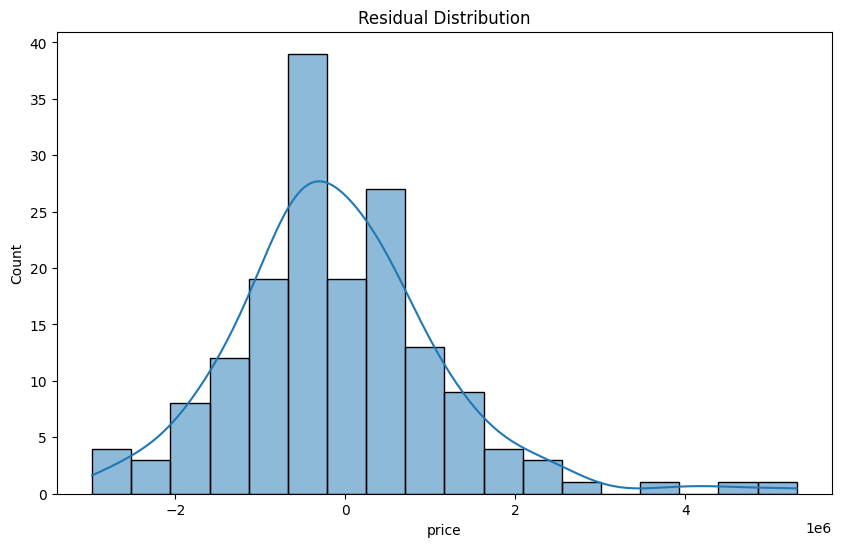

In [22]:
# Distribution of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

In [23]:
# Step 9: Feature Importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
                            Feature   Coefficient
2                         bathrooms  1.114751e+06
8                   airconditioning  6.858393e+05
7                   hotwaterheating  6.163754e+05
10                         prefarea  5.091921e+05
6                          basement  4.826035e+05
3                           stories  4.172676e+05
4                          mainroad  4.080737e+05
9                           parking  3.031112e+05
5                         guestroom  2.757105e+05
1                          bedrooms  8.089314e+04
0                              area  2.532873e+02
11  furnishingstatus_semi-furnished -1.216527e+05
12     furnishingstatus_unfurnished -3.911912e+05
